<a href="https://colab.research.google.com/github/jeffvun/Bio-Informatics-Exercises/blob/main/HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install necessary packages

In [3]:
install.packages("ggplotify")
install.packages("flexclust")
install.packages("fpc")
install.packages("ClusterR")
install.packages("corrplot")
install.packages("factoextra")
install.packages("devtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gmp’


Warning message in install.packages("ClusterR"):
“installation of package ‘gmp’ had non-zero exit status”
Warning message in install.packages("ClusterR"):
“installation of package ‘ClusterR’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xtable’, ‘sourcetools’, ‘shiny’, ‘downlit’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’




### Load necessary packages for clustering

In [6]:
library(corrplot)
library(cluster)
library(stats)
library(gridExtra)

# library(ClusterR)
devtools::install_github("cran/ClusterR")
library(dplyr)
library(factoextra)
library(flexclust)
library(fpc)
library(ggplot2)
library(ggplotify)
library(ggpubr)
library(knitr)

isoband (0.2.6 -> 0.2.7) [CRAN]
gmp     (NA    -> 0.7-2) [CRAN]


Installing 2 packages: isoband, gmp

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘gmp’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpq8er2S/remotes50c56a38fa2/cran-ClusterR-982467d/DESCRIPTION’ ... OK
* preparing ‘ClusterR’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ClusterR_1.3.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmpq8er2S/file50c4739551b/ClusterR_1.3.1.tar.gz’ had non-zero exit status”

Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



### Import Data

In [7]:
diabetes <- read.csv("/diabetes.csv")

### Explore data by row and column

In [8]:
sprintf("The dataset has %s records with a total of %s variables.", nrow(diabetes), ncol(diabetes))

[1] "The dataset has 253680 records with a total of 22 variables."

### Extracting 2% of total dataset

In [9]:
diabetes_sub <- diabetes[sample(1:nrow(diabetes), 0.02*(253680), replace=FALSE),]

In [10]:
sprintf("The dataset has %s records with a total of %s variables", nrow(diabetes_sub), ncol(diabetes_sub))

[1] "The dataset has 5073 records with a total of 22 variables"

### Prepare data for Analysis

#### Handling Missing Values

In [11]:
sprintf("The dataset contains %s number of missing values.", sum(is.na(diabetes_sub)))

[1] "The dataset contains 0 number of missing values."

#### Normalization of data

In [12]:
diabetes_sub_norm <- as.data.frame(lapply(diabetes_sub[, 2:ncol(diabetes_sub)], scale))

#### Checking on association

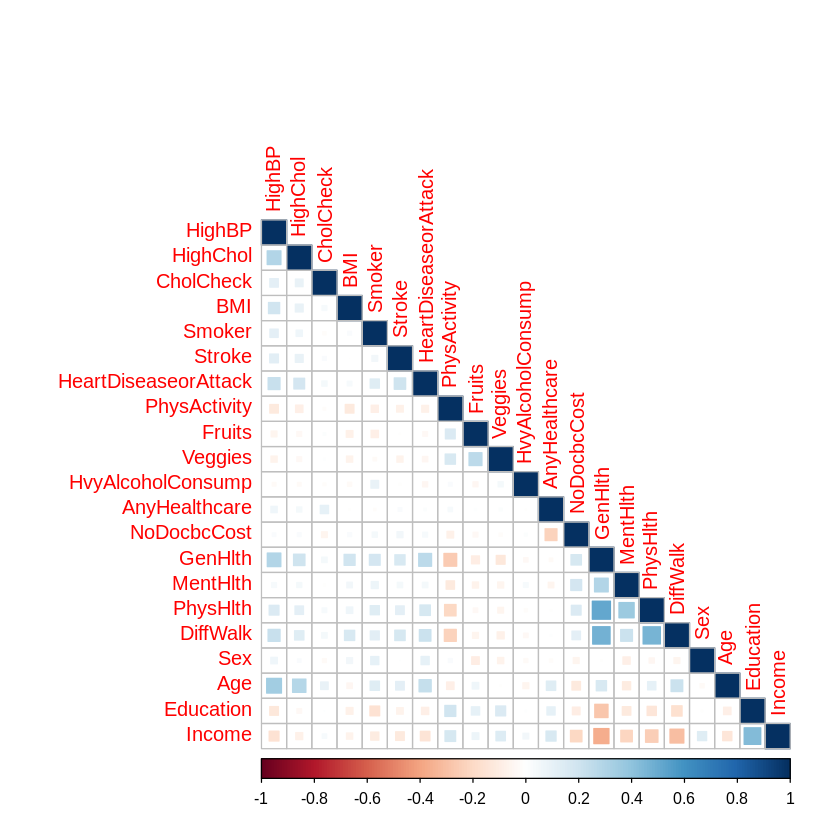

In [13]:
corr_matrix <-cor(diabetes_sub_norm)

corrplot(corr_matrix, type="lower", method="square")

### Optimal Number of Clusters

In [14]:
k <- fviz_nbclust(diabetes_sub_norm, FUNcluster=kmeans, method="silhouette") + ggtitle("K-means")

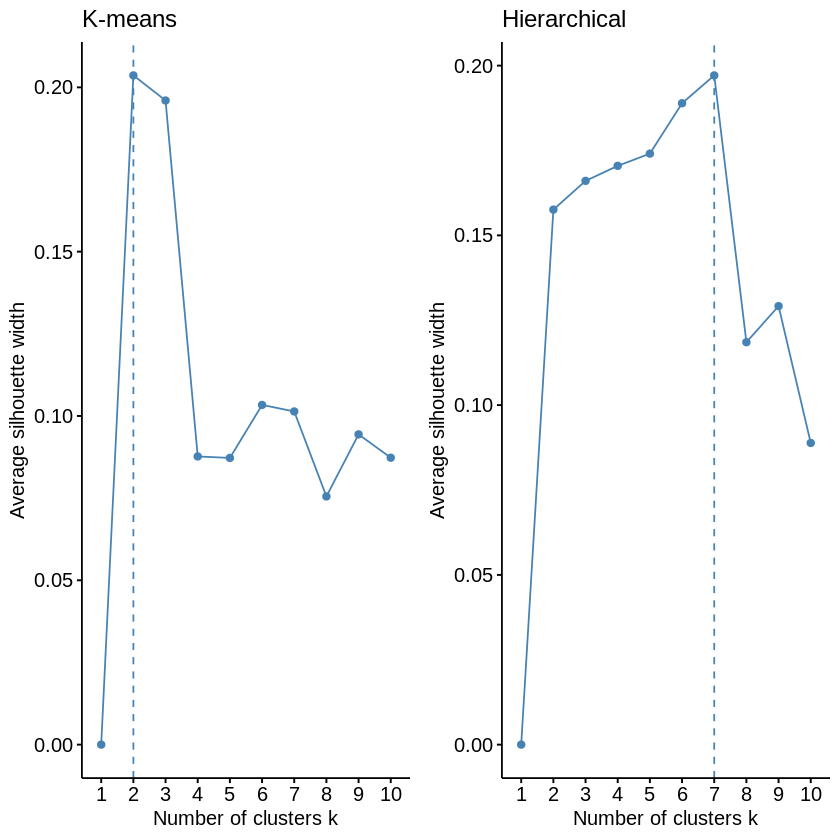

In [19]:
h <- fviz_nbclust(diabetes_sub_norm, FUNcluster = hcut, method = "silhouette") + ggtitle("Hierarchical")
grid.arrange(k, h, ncol=2)

In [20]:
gap_stat <- clusGap(diabetes_sub, FUN = hcut, nstart = 25, K.max = 5, B = 50)

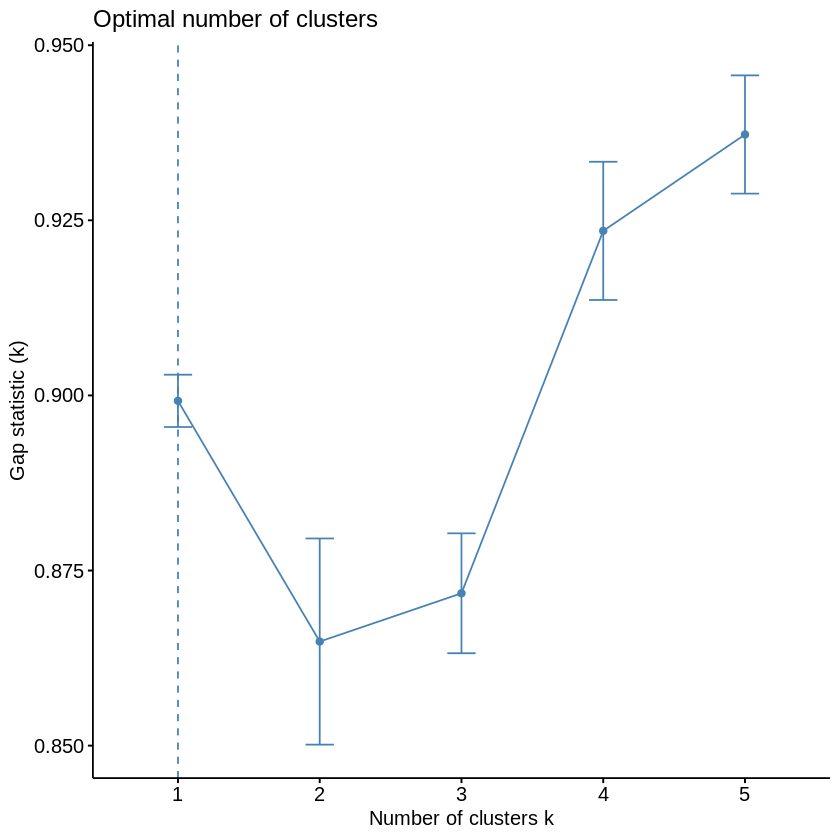

In [21]:
fviz_gap_stat(gap_stat)

### Producing Hierarchical Tree

In [22]:
diabetes_sub_matrix <- dist(diabetes_sub_norm, method = "euclidean")

In [23]:
diabetes_sub_hc_w <- hclust(diabetes_sub_matrix, method = "ward.D2" )

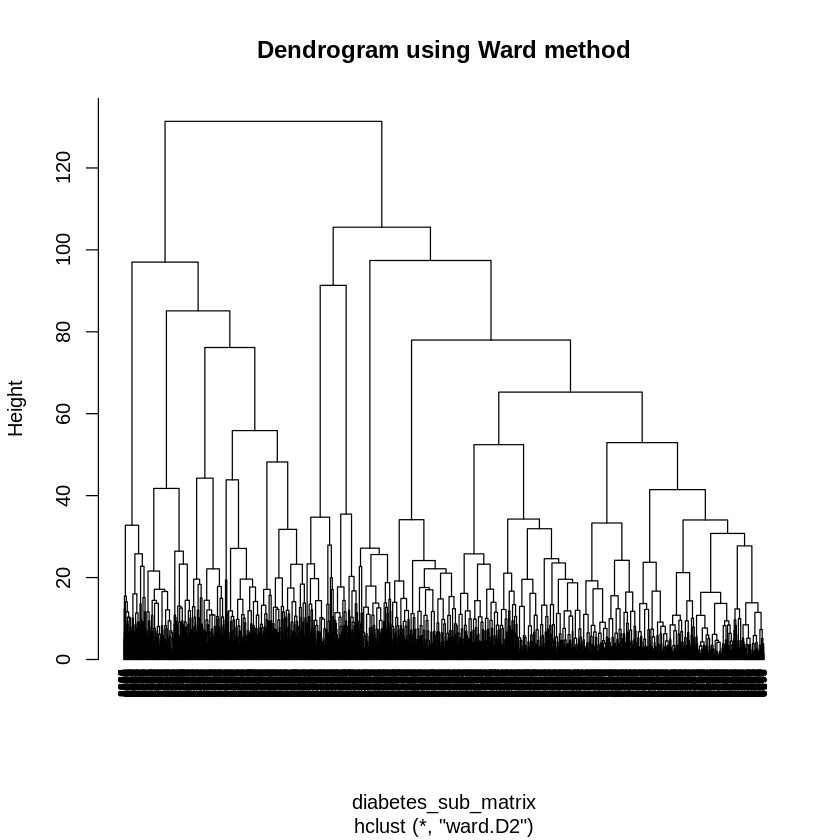

In [24]:
plot(diabetes_sub_hc_w, cex = 0.6, hang = -1, main = "Dendrogram using Ward method")

Assuming we want to form 7 clusters, we can determine how the groups are formed as follow:

In [25]:
diabetes_sub_w1 <- cutree(diabetes_sub_hc_w, k = 7)

In [26]:
table(diabetes_sub_w1)

diabetes_sub_w1
   1    2    3    4    5    6    7 
 177 2954  909  361  263  191  218 